In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HORI_RES = 180
ASPECT = 2.5 # Height of Character / Width of Character in terminal

def resize(img, hori_res, character_aspect_ratio):
    new_size = (hori_res, int(hori_res / character_aspect_ratio * img.shape[0] / img.shape[1]))
    return cv2.resize(img, new_size)    

def black_white(img):
    return (~np.round(img / 255).astype(bool)).astype(int)



In [3]:
HORI_RES / ASPECT * 1080/1440

54.0

In [4]:
def to_ascii(img):
    with open("shitty_ascii.txt", "w") as f:
        write = "\n".join(["".join([" " if x == 0 else '#' for x in row]) for row in img])
        f.write(write)

def to_text_python_list(img):
    with open("python_list.txt", "w") as f:
        f.write(str(img.tolist()))

def to_text_lisp_list(img):
    with open("lisp_list.txt", "a") as f:
        f.write("'" + str(img.tolist()).replace(", ", " ").replace("[", "(").replace("]", ")") + "\n")

def to_slice_encoding(img):
    output = "'("

    for row_num, row in enumerate(img):
        padded_row = np.pad(row, (1,1), constant_values=0) # detect start and ends of frame
        
        shifted_row = np.roll(padded_row, 1) # shift and XOR to detect block edges 
        xor = np.logical_xor(padded_row,shifted_row)
        xor = xor[1:]

        where = np.where(xor)[0] # extract edge positions

        slices = [(row_num, where[x], where[x+1]) for x in range(0, len(where), 2)]

        for slice in slices:
            if len(slice) > 0:
                output += f"({slice[0]} {slice[1]} {slice[2]}) "

    output = output.strip() + ")\n"

    return output
    



In [5]:
img = cv2.imread(f"bad_apple/image_sequence/bad_apple_{'3413'}.png", cv2.IMREAD_GRAYSCALE)
img = resize(img, HORI_RES, ASPECT)
img = black_white(img)

with open("slice-list.el", "w") as f:
    f.write(to_slice_encoding(img))

# to_text_lisp_list(img)

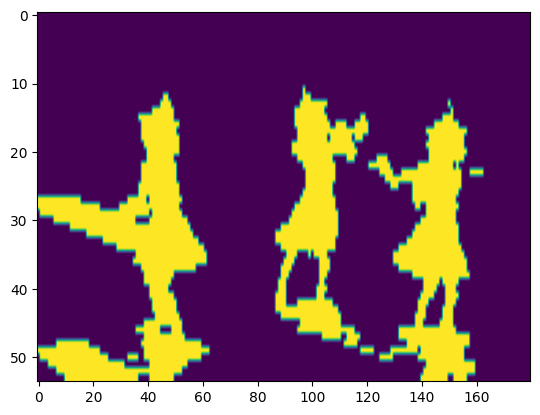

In [16]:
display = np.zeros((54, 180))

for slice in [x[1:].split(" ") for x in to_slice_encoding(img)[2:-3].split(") ")]:
    display[int(slice[0]), int(slice[1]):int(slice[2])] = 1


plt.imshow(display, aspect=2.5)
plt.show()

In [6]:
NUM_FRAMES = 6562
#NUM_FRAMES = 1000

write = ""
for i in range(1, NUM_FRAMES+1, 2):
    str_i = str(i)

    while len(str_i) < 3:
        str_i = "0" + str_i
    
    img = cv2.imread(f"bad_apple/image_sequence/bad_apple_{str_i}.png", cv2.IMREAD_GRAYSCALE)
    img = resize(img, HORI_RES, ASPECT)
    img = black_white(img)

    write += to_slice_encoding(img)


with open("slice-list.el", "w") as f:
    f.write(write)

    # 	    (message "processing time for frame: %.3f | frame-number %s \n" (- (float-time) frame-start-time) frame-number)